In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.graphics.tsaplots import plot_acf



In [3]:
%load_ext autoreload
%matplotlib inline

-Table description:
--
-beer_train.csv - the training set
-beer_test.csv - the test set
-sampleSubmission.csv - a sample submission file in the correct format
-id_store_sku.csv - id - store_id - sku_name mapping
-sku_features.csv - SKU Features

-Feature description:
--
-Date - calendar date
-ts_id - time-series identification, each of them describe sales of one SKU at one Store
-isPromo - how many types of promotion were active on this day. 0 = no promotions, 1 = a single promotion type (for example, -price discount), 2 = two promotion types simultaneously (for example, both price discount and special placement)-
-Sales - actual sales, target
-id - identifier of rows in the submission file (the same order as in the test set). This is the key column Kaggle uses to match the test labels and your predictions. Order matters
-Store - identifier of the stores (supermarket)
-SKU - Stock Keeping Unit. Identifier of the product
-Segment - price segment of the product
-Pack - package type
-Product - type of the drink
-Brand - product's brand
-Volume - package size

In [4]:
beer_train = pd.read_csv("data/beer_train.csv")
beer_train
#xt=[]
#for x in range(beer_train['ts_id'].max()):
#    if x not in beer_train['ts_id'].unique():
#        xt.append(x)
#len(xt)#179

#xt

# xt=[]
# for x in range(beer_train['ts_id'].max()): #For each ts_id
#     if x in beer_train['ts_id'].unique():
#         temp=beer_train.loc[beer_train['ts_id'] == x]
#         xt.append(len(temp["Date"].unique()))
    
# set(xt)

#len(beer_train['ts_id'].unique())
#beer_train.loc[beer_train['ts_id'] == 0]

,Date,ts_id,isPromo,Sales
0,2015-06-15,0,0.0,0.100
1,2015-06-15,1,0.0,0.350
2,2015-06-15,2,1.0,0.600
3,2015-06-15,3,1.0,0.350
4,2015-06-15,4,0.0,0.150
...,...,...,...,...
1382316,2017-06-14,2059,0.0,0.405
1382317,2017-06-14,2060,0.0,0.180
1382318,2017-06-14,2061,1.0,0.810
1382319,2017-06-14,2062,1.0,0.360


In [82]:
beer_test = pd.read_csv("data/beer_test.csv")
#beer_test

#xt=[]
#for x in range(2070):
#    if x not in beer_test['ts_id'].unique():
#        xt.append(x)
#len(xt)#179

# xt=[]
# for x in range(beer_test['ts_id'].max()): #For each ts_id
#     if x in beer_test['ts_id'].unique():
#         temp=beer_test.loc[beer_test['ts_id'] == x]
#         xt.append(len(temp["Date"].unique()))
    
# set(xt)

#len(beer_test["ts_id"].unique())#.loc[beer_test["ts_id" ]==0 ]#Ok only prediction in the future

In [6]:
sampleSubmission = pd.read_csv("data/sampleSubmission.csv")


In [83]:
id_store_sku = pd.read_csv("data/id_store_sku.csv")
#len(id_store_sku["ts_id"].unique()) #267 Stores
#id_store_sku.loc[id_store_sku['SKU'] == "_Holsten Bottle 0,47"] No value
#id_store_sku["Store"]
#xt=[]
#for x in range(2070):
#    if x not in id_store_sku['ts_id'].unique():
#        xt.append(x)
#len(xt)#179
#xt
#id_store_sku

#len(id_store_sku["SKU"].unique()) #18 SKU

In [84]:
sku_features = pd.read_csv("data/sku_features.csv")
#sku_features

In [85]:
result = pd.merge(id_store_sku, sku_features, on="SKU")
#result.sort_values(by=['ts_id'])
#len(final_result['SKU'].unique()) #256 Stores


In [139]:
final_result = pd.merge(beer_train, result, on="ts_id")
final_result
    
set(final_result['SKU'])

{'_Baltika Cooler Bottle 0,47',
 '_Baltika Draught PET 0,47',
 '_Baltika №0 Can 0,45',
 '_Baltika №3 Can 0,45',
 '_Baltika №7 Bottle 0,47',
 '_Baltika №7 Can 0,45',
 '_Baltika №9 Can 0,45',
 '_Carlsberg Can 0,45',
 '_Don PET 1,42',
 '_Firmennoe PET 1,42',
 '_Flash Up Energy PET 0,5',
 '_Priazovskoye Bottle 0,47',
 '_Priazovskoye PET 1,42',
 '_Tuborg Green Bottle 0,48',
 '_Tuborg Green Can 0,45',
 '_Zatecky Gus Bottle 0,48',
 '_Zatecky Gus Can 0,45',
 '_Zatecky Gus PET 1,42'}

In [86]:
#len(final_result['ts_id'].unique()) #256 Stores
#pd.DataFrame.drop_duplicates(final_result) ok

# Visualization (EDA)

There are 267 stores and 18 SKU in id_store_sku
There are 19 SKU in sku_features
There are 256 stores, 18 SKU, in the final join

That means that we don't have sales for 11 stores, and a beer is not sold anywhere


There are 1944 ts_id in id_store_sku
There are 1891 ts_id in beer_train and beer_test
We have 173 missing ts_id in beer_train and beer_test
We have 120 missing ts_id in id_store_sku

That means that for 53 ts_ids we don't have sales, for 120 we don't have sales either correspondance with beer/store


Date
For the train, we have 731 data points(days) for each ts_id
For the test, we have 102 data points(days) for each ts_id

In [ ]:
#Transform Date into suitable for regression (8 to 10 columns) ALSO FOR TEST
    #Month 1-12
    #Year 2015-2017
    #Week 1-53
    #Weekday 1-7 -->Also include weekends
    #Holiday categorical
    #SchoolDay 0-1
    #Birthdays distribution in Russia
    #Other columns
    #Seasons categorical
    #See down
                                                        #Miguel
    
#Find if isPromo/Sales are affected by other columns( Segment/Brand/...), if so add another column with useful info
# Example add column PromoSegmentEffectiveness with values double=2, triple=3....0.7...
# If we see that there are no correlation, (throw away columns) maybe
                                                        
                                                        #Laura

#Trend/seasonalities?

# Heatmap understand and do stuff --> After adding columns

#Outliers?

#Categorical?

#Linearly dependent

#Autocorrelation

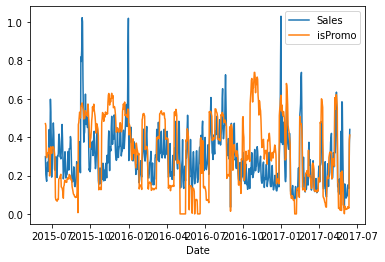

In [144]:
#Trends/seasonalities for group of things (see if sales are growing/reducing for a certain segment/brand...)

                                                        #Simone
fr = final_result
fr['Date'] = pd.to_datetime(final_result['Date'])

fr = fr[fr['Segment']=="Premium"]
fr
res = fr.groupby(fr['Date'].dt.date).mean()  
res
plot_cols = ['Sales','isPromo']#'isPromo'
plot_features = res[plot_cols]
_ = plot_features.plot(subplots=False)

PACK Can, PET, Bottle
Can : Seasonality around mid-september/begin june 2x (down) and new year/may (up)
PET : september(down)
Bottle : new year (up)

SEGMENT Premium, MainStream, High Margin
Premium : Seasonality new year (up), september/june (down)
MainStream: maybe little trend up, september/june (down) HIGH CORR WITH ISPROMO !!
High Margin: only 51 ts_id, 0 since OCT 2015, HIGH CORR WITH ISPROMO !!

PRODUCT Lager, Energy-drink, Non-alco, Other
Lager: september/june (down) new year (up)
Energy-drink: 0 since OCT 2015, GOOD CORR WITH ISPROMO !!
Non-alco: REAALLY VARIABLE,  new year (up), up in summer IS PROMO USELESS !!
Other: VERY HIGH CORR WITH ISPROMO !!

VOLUME 0.45, 0.5, 1.5
0.45: september/june (down), new year (up)
0.5: september/june (down), new year (up)
1.5: GOOD CORR WITH ISPROMO !!

STORE: TOO MANY

BRAND Carlsberg Flash Tuborg Zatecky Gus Baltika №3 Baltika №7 Baltika №9 Baltika Cooler Baltika Draught Don Firmennoe Priazovskoye
Carlsberg : HIGH CORR WITH ISPROMO !!
Flash : GOOD CORR WITH ISPROMO !!
Holsten : no data
Tuborg : GOOD CORR WITH ISPROMO !!
Zatecky Gus : GOOD CORR WITH ISPROMO !!
Baltika №3 : GOOD CORR WITH ISPROMO !!
Baltika №7 : GOOD CORR WITH ISPROMO !!
Baltika №9 : september/june (down)
Baltika Cooler : HIGH CORR WITH ISPROMO !!
Baltika Draught : HIGH CORR WITH ISPROMO !!
Don : GOOD CORR WITH ISPROMO !!
Firmennoe : GOOD CORR WITH ISPROMO !!
Priazovskoye : random

In [ ]:
#Found online, see if something is useful
# Below function extracts date related features from datetime
# def create_date_featues(df):

#     df['Year'] = pd.to_datetime(df['DateTime']).dt.year

#     df['Month'] = pd.to_datetime(df['DateTime']).dt.month

#     df['Day'] = pd.to_datetime(df['DateTime']).dt.day

#     df['Dayofweek'] = pd.to_datetime(df['DateTime']).dt.dayofweek

#     df['DayOfyear'] = pd.to_datetime(df['DateTime']).dt.dayofyear

#     df['Week'] = pd.to_datetime(df['DateTime']).dt.week

#     df['Quarter'] = pd.to_datetime(df['DateTime']).dt.quarter 

#     df['Is_month_start'] = pd.to_datetime(df['DateTime']).dt.is_month_start

#     df['Is_month_end'] = pd.to_datetime(df['DateTime']).dt.is_month_end

#     df['Is_quarter_start'] = pd.to_datetime(df['DateTime']).dt.is_quarter_start

#     df['Is_quarter_end'] = pd.to_datetime(df['DateTime']).dt.is_quarter_end

#     df['Is_year_start'] = pd.to_datetime(df['DateTime']).dt.is_year_start

#     df['Is_year_end'] = pd.to_datetime(df['DateTime']).dt.is_year_end

#     df['Semester'] = np.where(df['Quarter'].isin([1,2]),1,2)

#     df['Is_weekend'] = np.where(df['Dayofweek'].isin([5,6]),1,0)

#     df['Is_weekday'] = np.where(df['Dayofweek'].isin([0,1,2,3,4]),1,0)
    
#     df['Hour'] = pd.to_datetime(df['DateTime']).dt.hour
    
#     return df

# Data cleaning

In [ ]:
#Find if there are duplicates
final_result = pd.DataFrame.drop_duplicates(final_result)# Nothing happens
beer_test = pd.DataFrame.drop_duplicates(beer_test)# Nothing happens


In [ ]:
#Find if there are nan
final_result.isnull().sum().sum() #No nan found
beer_test.isnull().sum().sum() #No nan found

In [ ]:
#Handle categorical features
#Handle date
final_result['Date'] = pd.to_datetime(final_result['Date'])
s = (final_result.dtypes == 'object')
object_cols = list(s[s].index)
ordinal_encoder = OrdinalEncoder()
# Apply ordinal encoder to each column with categorical data
final_result[object_cols] = ordinal_encoder.fit_transform(final_result[object_cols])
final_result
#Handle date for test set
beer_test['Date'] = pd.to_datetime(beer_test['Date'])

In [ ]:
#Handle correlation between columns
#TODO also for test
plt.figure(figsize=(10,10))
sns.heatmap(final_result.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
#Find outliers
#TODO also for test

In [ ]:
#Plot
ts_id0 = final_result[final_result['ts_id']==0]
date_time = pd.to_datetime(ts_id0.pop('Date'), format='%Y-%m-%d')
plot_cols = ['Sales','isPromo','Segment']
plot_features = ts_id0[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [ ]:
#See if columns are linearly dependent
#TODO
# import sympy 
# reduced_form, inds = sympy.Matrix(final_result.values).rref()
# inds

In [ ]:
#TODO Check autocorrelation

# plot_acf(beer_train['Sales'], lags=1)
# plt.show()

# Feature engineering

In [ ]:
#Create new features
#Todo also for test

In [ ]:
#Feature selection
#Todo also for test

# Time series preprocessing

In [ ]:
#✔Trends (to describe increasing or decreasing behavior of the time series frequently presented in linear modes).
#✔Seasonality (to highlight the repeating pattern of cycles of behavior over time) 
#✔Irregularity/Noise (to regard the non-systematic aspect of time series deviating from the common model values)
#✔Cyclicity (to identify the repetitive changes in the time series and define their placement in the cycle). 
#Then add back?

# Algorithms + tuning

In [ ]:
#random forest with sliding windows / extratree (walk-forward)
#gradient boosting machines/xgboost/lightgbm(ok categorical features) recommended by Ruslan/catboost (ok categorical)
#linear regression/LSTM/ARIMA
#Stacking (max 2 levels) Use stacking to increase accuracy


In [ ]:
#Validation + hyperparam tuning
    
#from sklearn.model_selection import TimeSeriesSplit


# Predict

In [ ]:
#Predict and save on test

In [ ]:
#visual

#cleaning: 
    #duplicates (ok), 
    #outliers (find and see if ok or problems, see if have lot in test?)
    #Nan (ok)final_result.isnull().sum().sum()
    #Correlation between columns

#feature engineering for all --> 
    #avoid target leakage
    #Use feature selection
    #Categorical features 

#Cleaning and feature engineering also for test !!!!!!!!!!!!!
#detrend/season --> Then add back(?)



#Every ts_id is a time series --> for each ts_id do  
#Choose algorithm
#Validation = divide train test, 
    #from sklearn.model_selection import TimeSeriesSplit
    
#(Automate tuning, find best)--> Scikit optimize? (isPromo??)
#Train/test then predict

#Can do global algorithm (NBeats??)